In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb

import sys, os
root_dir = os.path.abspath("..")
if root_dir not in sys.path:
    sys.path.append(root_dir)

from fci import *
import pandas as pd

from IPython.display import display, Markdown

In [3]:
bn = gum.loadBN("instances/bn-20n-20a-3.bif")
bn

(pyagrum.BayesNet@0x11d04fa00) BN{nodes: 20, arcs: 20, domainSize: 10^9.18436, dim: 344, mem: 4Ko 424o}

In [4]:
from tqdm import tqdm
for i in tqdm(range(10)):
    gum.generateSample(bn, 1_000_000, f"data/bn-20n-20a-3-test{i+1}.csv")

100%|███████████████████████████████████████████| 10/10 [00:41<00:00,  4.14s/it]


CPU times: user 17.1 s, sys: 828 ms, total: 17.9 s
Wall time: 1.93 s
CPU times: user 20.6 s, sys: 1.02 s, total: 21.6 s
Wall time: 2.37 s


## Results of the data/bn-20n-20a-3-test10.csv

### Markov equivalence class (PAG)

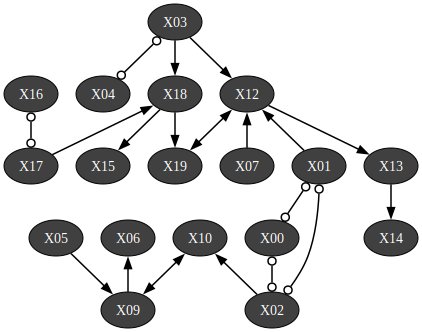

### Causal differences

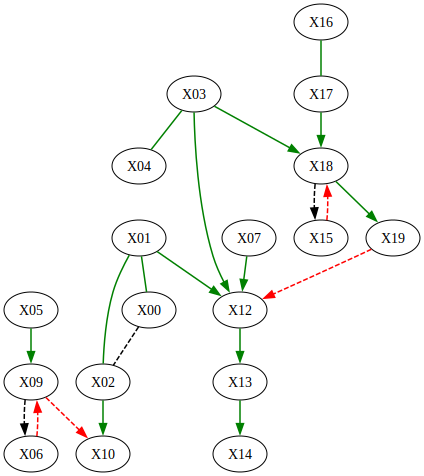

CPU times: user 16.8 s, sys: 803 ms, total: 17.6 s
Wall time: 1.88 s
CPU times: user 39.9 s, sys: 2 s, total: 41.9 s
Wall time: 4.63 s


## Results of the data/bn-20n-20a-3-test5.csv

### Markov equivalence class (PAG)

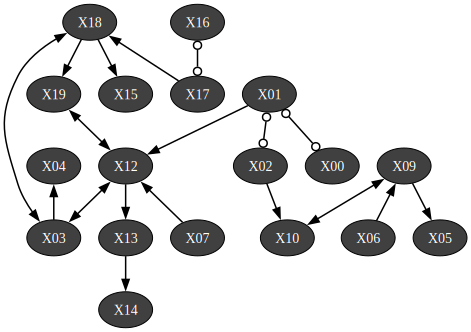

### Causal differences

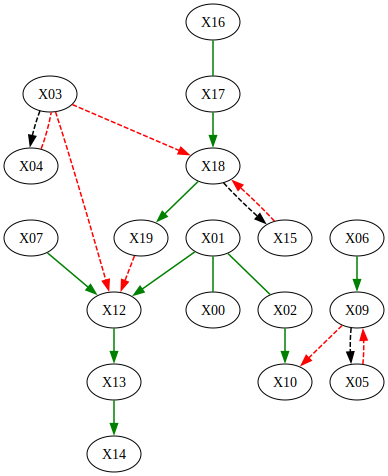

CPU times: user 17.9 s, sys: 847 ms, total: 18.7 s
Wall time: 1.98 s
CPU times: user 21.9 s, sys: 1.08 s, total: 23 s
Wall time: 2.52 s


## Results of the data/bn-20n-20a-3-test4.csv

### Markov equivalence class (PAG)

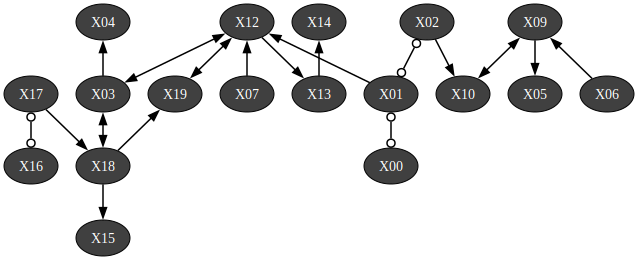

### Causal differences

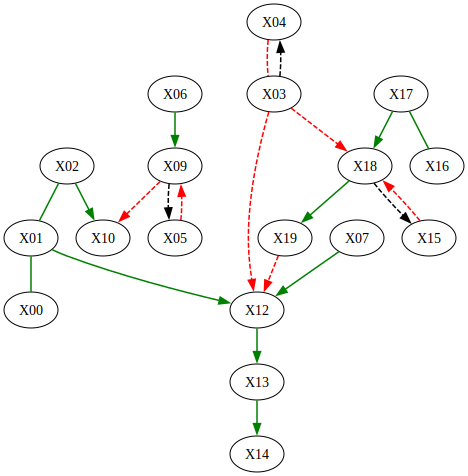

CPU times: user 17.5 s, sys: 852 ms, total: 18.3 s
Wall time: 1.99 s
CPU times: user 10.4 s, sys: 498 ms, total: 10.9 s
Wall time: 1.23 s


## Results of the data/bn-20n-20a-3-test6.csv

### Markov equivalence class (PAG)

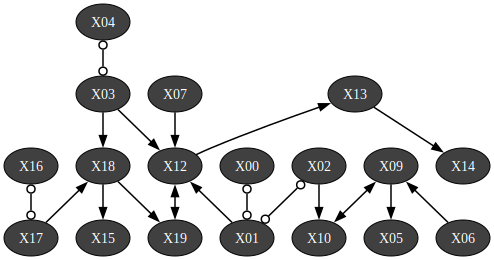

### Causal differences

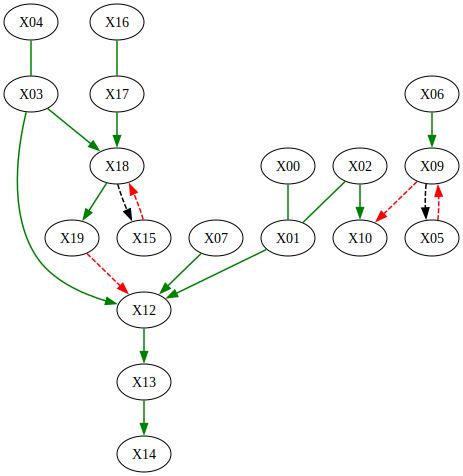

CPU times: user 15.5 s, sys: 848 ms, total: 16.3 s
Wall time: 1.98 s
CPU times: user 1min 11s, sys: 5.19 s, total: 1min 16s
Wall time: 10.8 s


## Results of the data/bn-20n-20a-3-test7.csv

### Markov equivalence class (PAG)

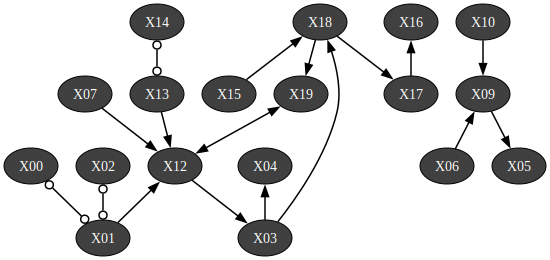

### Causal differences

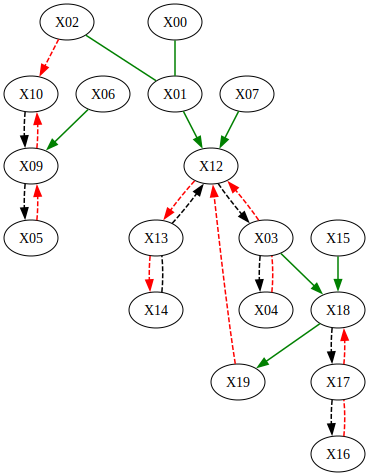

CPU times: user 15.6 s, sys: 856 ms, total: 16.5 s
Wall time: 2 s
CPU times: user 15.2 s, sys: 843 ms, total: 16.1 s
Wall time: 1.97 s


## Results of the data/bn-20n-20a-3-test3.csv

### Markov equivalence class (PAG)

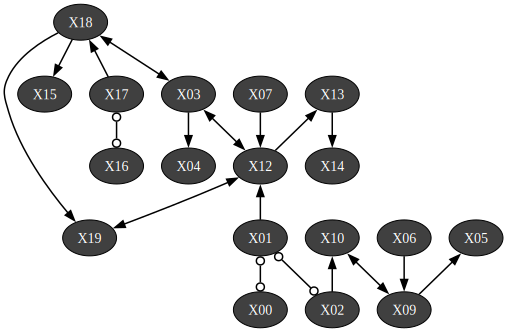

### Causal differences

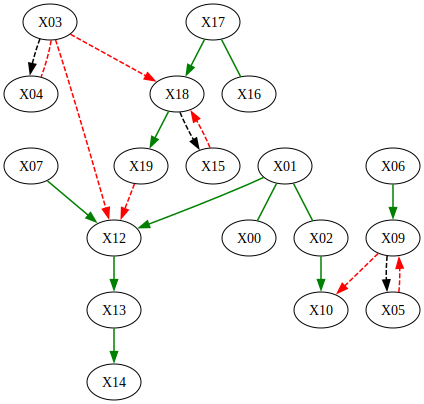

CPU times: user 15.3 s, sys: 852 ms, total: 16.1 s
Wall time: 2.05 s
CPU times: user 10.3 s, sys: 612 ms, total: 10.9 s
Wall time: 1.58 s


## Results of the data/bn-20n-20a-3-test2.csv

### Markov equivalence class (PAG)

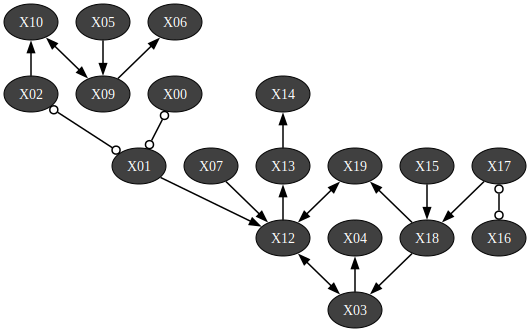

### Causal differences

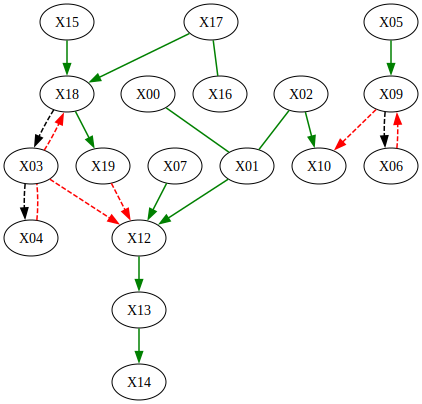

CPU times: user 15.9 s, sys: 819 ms, total: 16.7 s
Wall time: 2.24 s
CPU times: user 11.5 s, sys: 572 ms, total: 12.1 s
Wall time: 1.49 s


## Results of the data/bn-20n-20a-3-test1.csv

### Markov equivalence class (PAG)

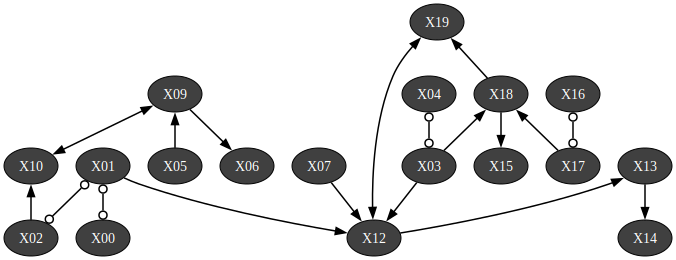

### Causal differences

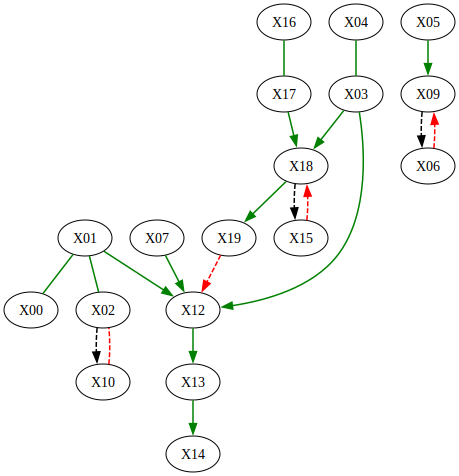

CPU times: user 15.3 s, sys: 812 ms, total: 16.1 s
Wall time: 2.39 s
CPU times: user 15 s, sys: 780 ms, total: 15.8 s
Wall time: 2.29 s


## Results of the data/bn-20n-20a-3-test9.csv

### Markov equivalence class (PAG)

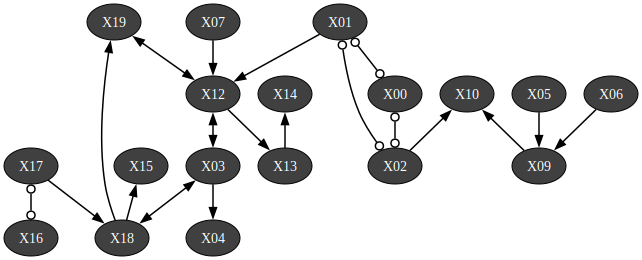

### Causal differences

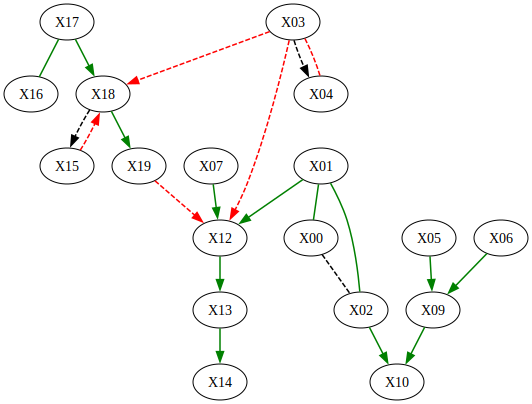

CPU times: user 16.3 s, sys: 804 ms, total: 17.1 s
Wall time: 2.76 s
CPU times: user 41.8 s, sys: 2.28 s, total: 44.1 s
Wall time: 6.11 s


## Results of the data/bn-20n-20a-3-test8.csv

### Markov equivalence class (PAG)

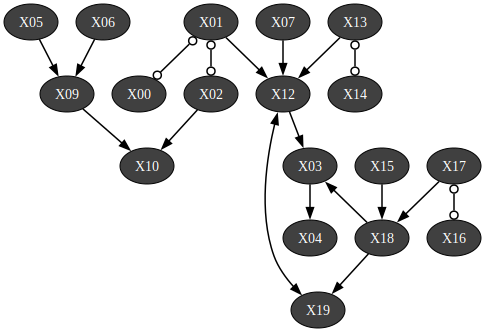

### Causal differences

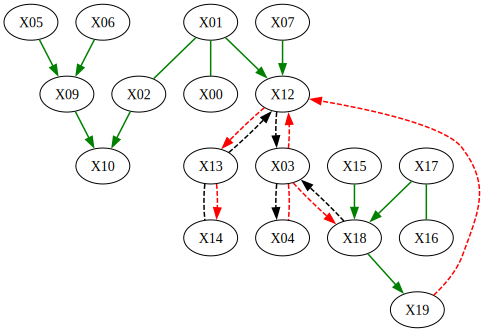

In [5]:
from pathlib import Path

for name in Path("data/").glob("bn-20n-20a-3-test*"):
    df = pd.read_csv(name)
    df = df.drop(["X11", "X08"], axis=1)

    learner = gum.BNLearner(df)
    learner.useMIIC()
    
    %time gumPDAG = learner.learnPDAG()
    %time pag, _ = fci(learner, ruleVerbose=False)

    display(
        Markdown(f"## Results of the {name}"),
        Markdown("### Markov equivalence class (PAG)"),
        toDot(pag),
        Markdown("### Causal differences"),
        showCausalDifferences(pag, gumPDAG, learner.names())
    )